In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
ins = pd.read_csv('insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

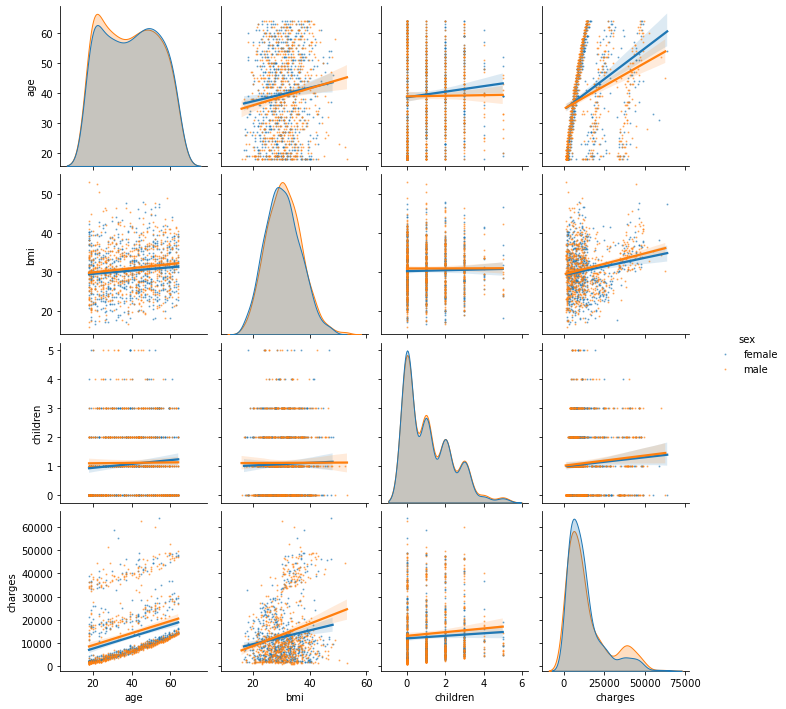

In [79]:
sns.pairplot(ins, kind='reg', hue='sex', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

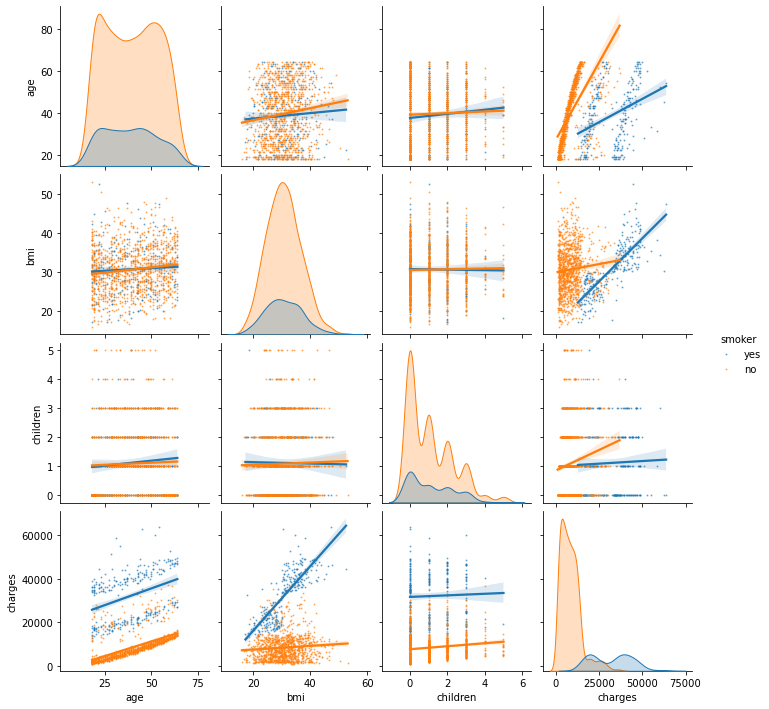

In [80]:
sns.pairplot(ins, kind='reg', hue='smoker', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

In [81]:
ins['bmi30'] = np.where(ins.bmi > 30, 1, 0)

In [82]:
ins

,age,sex,bmi,children,smoker,region,charges,bmi30
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [83]:
data = ins.drop(columns='charges')
X=pd.get_dummies(data, drop_first=True)
y=ins.charges

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=2021, test_size=0.3
)

- linearregressor

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train )
lr.score(X_test, y_test)

0.7555212237476235

In [86]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   bmi30     1338 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 78.5+ KB


In [87]:
ins.children=ins.children.astype(str)
ins.sex = np.where(ins.sex == 'male',1,0)
ins.smoker = np.where(ins.smoker == 'yes',1,0)
ins['bmisq'] = ins.bmi **2
ins['bmi30*'] = ins.bmi30 * ins.smoker
ins['bmis1sm'] = ins.bmisq * ins.smoker
ins['bmisex'] = ins.bmi * ins.sex
ins['bmism'] = ins.bmi * ins.smoker

X = pd.get_dummies(ins.drop(columns='charges'), drop_first=True)
y= ins.charges

X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=2021, test_size=0.3
)
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
lr1.score(X_test, y_test)

0.874078009687614

In [88]:
X_train.mean()

age                  39.300214
sex                   0.522436
bmi                  30.709209
smoker                0.204060
bmi30                 0.527778
bmisq               981.317878
bmi30*                0.105769
bmis1sm             200.657123
bmisex               16.222826
bmism                 6.265636
children_1            0.232906
children_2            0.188034
children_3            0.111111
children_4            0.021368
children_5            0.014957
region_northwest      0.224359
region_southeast      0.287393
region_southwest      0.248932
dtype: float64

In [89]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
X_train_rb = rb.fit_transform(X_train)
X_test_rb = rb.fit_transform(X_test)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=2021, test_size=0.3
)
lr1 = LinearRegression()
lr1.fit(X_train_rb, y_train)
lr1.score(X_test_rb, y_test)

0.8707334302274735

In [91]:
ins2=pd.read_csv('insurance.csv')

In [92]:
ins2.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [93]:
# 연산 용량을 줄이기 위해서 사용
from sklearn.preprocessing import LabelEncoder

for col in ins2.columns[ins2.dtypes == 'object']:
    le = LabelEncoder()
    ins2[col] = le.fit_transform(ins2[col])
ins2.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

- decisiontree regressor(과적합 주의)

In [94]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    ins2.iloc[:,:-1], ins2.charges,random_state=2021, test_size=0.3
)
from sklearn.tree import DecisionTreeRegressor ## dtr은 모든 변수를 축평행으로 잘라 범주화 시킨다. 장단 존재
dtr = DecisionTreeRegressor()
dtr.fit(X_train2, y_train2)
dtr.score(X_test2, y_test2)

0.6719057145195682

In [95]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [105]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth' : range(3,9),'min_samples_leaf' : range(1,10), 'max_leaf_nodes':range(8,25,2)}
gv = GridSearchCV(dtr, param,  n_jobs=-1)
gv.fit(X_train2, y_train2)
gv.score(X_test2, y_test2)

0.8587903016498549

In [104]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

- supportvector regressor

In [100]:
from sklearn.svm import SVR, LinearSVR

svrl = LinearSVR()
svrl.fit(X_train_rb, y_train)
svrl.score(X_test_rb, y_test)

C:\Users\ICT01_02\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.47616537979991147

In [107]:
svrl.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [101]:
param = {'C' : [.0001,.001,.01,.1,1,10,100,1000]}
gv = GridSearchCV(svrl, param,  n_jobs=-1)
gv.fit(X_train_rb, y_train)
gv.score(X_test_rb, y_test)

C:\Users\ICT01_02\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7456844772376872

In [102]:
gv.best_params_

{'C': 100}

In [103]:
svr = SVR()
svr.fit(X_train_rb, y_train)
svr.score(X_test_rb, y_test)

-0.09170925416613152

In [106]:
param = {'C' : [.0001,.001,.01,.1,1,10,100,1000],
'gamma' : [.0001,.001,.01,.1,1,10,100,1000]}
gv = GridSearchCV(svr, param,  n_jobs=-1)
gv.fit(X_train_rb, y_train)
gv.score(X_test_rb, y_test)

0.7378856239636835

# ridge, lasso는 작은 노이즈 값까지 학습해 회귀계수가 커져 다중궁선성문제가 생길때 사용(일반적인 데이터 가공시 많이 사용한다.)

In [108]:
from sklearn.linear_model import Ridge, Lasso
rid = Ridge(alpha=1, max_iter=5000)
rid.fit(X_train_rb, y_train)
rid.score(X_test_rb, y_test)

0.8712752788609954

In [109]:
las = Lasso(alpha=1, max_iter=5000)
las.fit(X_train_rb, y_train)
las.score(X_test_rb, y_test)

C:\Users\ICT01_02\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8459263390.520957, tolerance: 13418390.540568922
  model = cd_fast.enet_coordinate_descent(


0.8715327073212163